In [114]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler,LabelEncoder, OneHotEncoder)

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from keras.layers import Dense, Conv1D, Bidirectional, GRU, LSTM, MaxPool1D, Flatten, Dropout, BatchNormalization, Reshape, Activation
from keras.models import Sequential
from keras.layers import Input
from keras.models import Model

from tensorflow.keras.utils import plot_model

##**LOAD DATA NSL-KDD**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def column_name(data):
  data.columns = [
      'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
      'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
      'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
      'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
      'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
      'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
      'dst_host_srv_rerror_rate', 'label', 'difficulty_level'
  ]
  return data

In [4]:
def load_data(url):
  return pd.read_csv(url, header=None)

###Load Data KDDTrain+

In [5]:
df_train = load_data('/content/drive/MyDrive/Persiapan Skripsi/Bismillah/IDS/dataset/NSL-KDD/KDDTrain+ (1).csv')
df_train = column_name(df_train)
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


###Load Data KDDTest+

In [7]:
df_test = load_data('/content/drive/MyDrive/Persiapan Skripsi/Bismillah/IDS/dataset/NSL-KDD/KDDTest+ (1).csv')
df_test = column_name(df_test)
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [8]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


##**Analisis & Eksplorasi Data**

###Analisis informasi data KDDTrain+

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [10]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

###Analisis informasi data KDDTest+

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [12]:
df_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

###Analisis data duplikat

In [13]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [14]:
df.shape

(148517, 43)

In [15]:
duplicate_rows = df[df.duplicated()]
print("Data Duplikat:")
duplicate_rows

Data Duplikat:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
126081,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
126139,0,tcp,private,S0,0,0,0,0,0,0,...,0.03,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune,21
126154,0,udp,domain_u,SF,44,44,0,0,0,0,...,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,normal,18
126208,0,icmp,ecr_i,SF,1480,0,0,1,0,0,...,1.00,0.00,1.00,0.51,0.0,0.0,0.0,0.0,pod,15
126214,0,udp,domain_u,SF,44,44,0,0,0,0,...,1.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,normal,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148440,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.08,0.00,0.00,1.0,1.0,0.0,0.0,neptune,21
148458,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf,20
148501,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf,19
148511,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf,20


###Analisis outliers

In [16]:
list_kolom = list(df.select_dtypes(include=['float64', 'int64']).columns)

In [17]:
list_kolom

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'difficulty_level']

In [18]:
def check_outlier(data, kolom):
  Q1 = data[kolom].quantile(0.25)
  Q3 = data[kolom].quantile(0.75)
  IQR = Q3-Q1
  batas_bawah = Q1-1.5*IQR
  batas_atas = Q3+1.5*IQR
  return data.loc[(data[kolom] < batas_bawah) | (data[kolom] > batas_atas)].shape[0]

In [19]:
hasil = []

for kolom in list_kolom:
  hasil.append({"nama_kolom":kolom, "jumlah_outlier":check_outlier(df, kolom)})

In [20]:
hasil

[{'nama_kolom': 'duration', 'jumlah_outlier': 13544},
 {'nama_kolom': 'src_bytes', 'jumlah_outlier': 16554},
 {'nama_kolom': 'dst_bytes', 'jumlah_outlier': 26284},
 {'nama_kolom': 'land', 'jumlah_outlier': 32},
 {'nama_kolom': 'wrong_fragment', 'jumlah_outlier': 1190},
 {'nama_kolom': 'urgent', 'jumlah_outlier': 19},
 {'nama_kolom': 'hot', 'jumlah_outlier': 3678},
 {'nama_kolom': 'num_failed_logins', 'jumlah_outlier': 600},
 {'nama_kolom': 'logged_in', 'jumlah_outlier': 0},
 {'nama_kolom': 'num_compromised', 'jumlah_outlier': 1655},
 {'nama_kolom': 'root_shell', 'jumlah_outlier': 224},
 {'nama_kolom': 'su_attempted', 'jumlah_outlier': 84},
 {'nama_kolom': 'num_root', 'jumlah_outlier': 697},
 {'nama_kolom': 'num_file_creations', 'jumlah_outlier': 329},
 {'nama_kolom': 'num_shells', 'jumlah_outlier': 66},
 {'nama_kolom': 'num_access_files', 'jumlah_outlier': 443},
 {'nama_kolom': 'num_outbound_cmds', 'jumlah_outlier': 0},
 {'nama_kolom': 'is_host_login', 'jumlah_outlier': 12},
 {'nama_ko

In [21]:
data_outlier = pd.DataFrame(hasil)

In [22]:
data_outlier = data_outlier.sort_values(ascending=False, by='jumlah_outlier').reset_index(drop=True)

In [23]:
data_outlier

,nama_kolom,jumlah_outlier
0,srv_diff_host_rate,33374
1,dst_host_rerror_rate,31970
2,dst_host_same_src_port_rate,29960
3,dst_host_srv_diff_host_rate,27581
4,dst_host_srv_rerror_rate,26608
5,dst_bytes,26284
6,rerror_rate,21953
7,srv_rerror_rate,21854
8,src_bytes,16554
9,srv_count,15045


In [24]:
for i in data_outlier['jumlah_outlier']:
  print(i)

33374
31970
29960
27581
26608
26284
21953
21854
16554
15045
13544
12609
9850
5884
4443
3678
1828
1655
1190
697
600
443
329
224
84
66
32
19
12
0
0
0
0
0
0
0
0
0
0


###Hanya untuk validasi outlier

In [25]:
Q1 = df['is_guest_login'].quantile(0.25)
Q3 = df['is_guest_login'].quantile(0.75)
IQR = Q3-Q1
batas_bawah = Q1-1.5*IQR
batas_atas = Q3+1.5*IQR

In [26]:
df.loc[(df['is_guest_login'] < batas_bawah) | (df['is_guest_login'] > batas_atas)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
129,26,tcp,ftp,SF,273,903,0,0,0,5,...,0.28,0.02,0.01,0.0,0.01,0.02,0.00,0.0,normal,21
190,15159,tcp,ftp,SF,350,1185,0,0,0,6,...,0.56,0.02,0.00,0.0,0.00,0.00,0.00,0.0,warezclient,2
506,1,tcp,ftp,SF,1238,2451,0,0,0,28,...,0.48,0.02,0.00,0.0,0.00,0.00,0.01,0.0,warezclient,15
525,30,tcp,ftp,SF,1458,4152,0,0,0,30,...,0.25,0.03,0.01,0.0,0.00,0.00,0.00,0.0,normal,20
581,0,tcp,ftp,SF,1250,2451,0,0,0,28,...,0.27,0.02,0.00,0.0,0.00,0.00,0.01,0.0,warezclient,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148359,283,tcp,ftp,SF,164,599,0,0,0,2,...,0.07,0.90,0.00,0.0,0.00,0.06,0.88,0.0,warezmaster,12
148364,281,tcp,ftp,SF,162,599,0,0,0,2,...,0.04,0.49,0.00,0.0,0.10,0.00,0.47,0.0,warezmaster,13
148407,283,tcp,ftp,SF,161,599,0,0,0,2,...,0.48,0.03,0.00,0.0,0.00,0.00,0.00,0.0,warezmaster,13
148419,282,tcp,ftp,SF,154,593,0,0,0,2,...,0.41,0.03,0.00,0.0,0.00,0.00,0.00,0.0,warezmaster,14


In [27]:
df['is_guest_login'].unique()

array([0, 1])

##**PRAPEMROSESAN DATA**

###**Data Cleaning**

####Hapus kolom yg tidak terpakai

In [28]:
#fungsi untuk menghapus kolom yang tidak terpakai
def column_drop(data, kolom):
  return data.drop(kolom, axis='columns', inplace=True)

In [29]:
column_drop(df, 'difficulty_level')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

####Hapus data duplikat

In [31]:
df = df.drop_duplicates()

In [32]:
df.reset_index(drop=True, inplace=True)

In [33]:
duplicate_rows = df[df.duplicated()]
print("Data Duplikat:")
duplicate_rows

Data Duplikat:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label


In [34]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147902,1,tcp,smtp,SF,2599,293,0,0,0,0,...,186,0.73,0.13,0.00,0.00,0.00,0.00,0.26,0.00,mailbomb
147903,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
147904,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
147905,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back


In [35]:
df.shape

(147907, 42)

###**Normalisasi & Reduksi Dimensi Data**

####Normalisasi data (StandardScaler)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147907 entries, 0 to 147906
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     147907 non-null  int64  
 1   protocol_type                147907 non-null  object 
 2   service                      147907 non-null  object 
 3   flag                         147907 non-null  object 
 4   src_bytes                    147907 non-null  int64  
 5   dst_bytes                    147907 non-null  int64  
 6   land                         147907 non-null  int64  
 7   wrong_fragment               147907 non-null  int64  
 8   urgent                       147907 non-null  int64  
 9   hot                          147907 non-null  int64  
 10  num_failed_logins            147907 non-null  int64  
 11  logged_in                    147907 non-null  int64  
 12  num_compromised              147907 non-null  int64  
 13 

In [37]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ["duration","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]
x = df.loc[:, numeric_columns].values
y = df.loc[:, ['label']].values
data_normalisasi=StandardScaler().fit_transform(x)
print(data_normalisasi)

[[-1.12715706e-01 -7.35984828e-03 -4.62347009e-03 ... -5.85847801e-01
  -2.66566824e-01 -4.06345810e-01]
 [-1.12715706e-01 -7.42349277e-03 -4.62347009e-03 ... -5.85847801e-01
  -4.21678405e-01 -4.06345810e-01]
 [-1.12715706e-01 -7.45042638e-03 -4.62347009e-03 ...  1.73929403e+00
  -4.21678405e-01 -4.06345810e-01]
 ...
 [-1.12715706e-01 -7.39194724e-03 -4.37071765e-03 ... -5.85847801e-01
  -4.21678405e-01 -4.06345810e-01]
 [-1.12715706e-01  2.61093709e-03 -2.38318893e-03 ... -5.85847801e-01
  -2.04522192e-01 -1.97345788e-01]
 [-1.12715706e-01 -7.45042638e-03 -4.62347009e-03 ... -5.85847801e-01
   9.43303507e-01  2.57936878e+00]]


In [38]:
df_normalisasi = pd.DataFrame(data_normalisasi, columns = numeric_columns)

In [39]:
df_normalisasi

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.112716,-0.007360,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,-0.823833,-0.011492,...,-0.343646,-0.848781,-0.812254,-0.279291,0.084144,-0.282255,-0.598802,-0.585848,-0.266567,-0.406346
1,-0.112716,-0.007423,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,-0.823833,-0.011492,...,0.722302,-1.064599,-1.191758,2.657076,2.400683,-0.282255,-0.598802,-0.585848,-0.421678,-0.406346
2,-0.112716,-0.007450,-0.004623,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,-0.823833,-0.011492,...,0.722302,-0.839789,-0.968520,-0.176260,-0.470520,-0.282255,1.733009,1.739294,-0.421678,-0.406346
3,-0.112716,-0.007408,-0.002427,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,-1.561873,1.219478,1.040616,-0.433836,-0.372639,0.094016,-0.528847,-0.562596,-0.421678,-0.376489
4,-0.112716,-0.007414,-0.004510,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0.722302,1.219478,1.040616,-0.433836,-0.470520,-0.282255,-0.598802,-0.585848,-0.421678,-0.406346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147902,-0.112310,-0.006971,-0.004545,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0.722302,0.599001,0.437875,0.235861,-0.470520,-0.282255,-0.598802,-0.585848,0.384902,-0.406346
147903,-0.112716,-0.007304,-0.004534,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,-0.851241,0.194341,0.415551,-0.124745,-0.437893,-0.188187,-0.575484,-0.585848,-0.421678,-0.406346
147904,-0.112716,-0.007392,-0.004371,-0.014004,-0.085118,-0.010425,-0.094170,-0.059956,1.213838,-0.011492,...,0.133493,1.219478,1.040616,-0.433836,-0.437893,-0.188187,-0.575484,-0.585848,-0.421678,-0.406346
147905,-0.112716,0.002611,-0.002383,-0.014004,-0.085118,-0.010425,0.897313,-0.059956,1.213838,0.033397,...,0.722302,1.219478,1.040616,-0.433836,-0.470520,-0.282255,-0.598802,-0.585848,-0.204522,-0.197346


####Reduksi dimensi (Principal Component Analysis)

In [40]:
#Inisialisasi objek PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=7)

#Fit dan transformasi data yang telah dinormalisasi ke dalam komponen utama
principal_components = pca.fit_transform(data_normalisasi)

#hasil data yg telah direduksi dibuat dataframe kembali
principal_df = pd.DataFrame(data=principal_components, columns=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7'])

In [41]:
#menggabungkan kembali data dengan kolom categorical
df_final = pd.concat([principal_df, df[['protocol_type', 'service', 'flag','label']]], axis=1)
df_final

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,protocol_type,service,flag,label
0,-0.625775,-0.074213,-0.013703,-0.175545,-0.327472,0.192688,-0.077482,tcp,ftp_data,SF,normal
1,0.757552,0.947468,0.036986,-1.279834,-0.823129,1.764592,-0.454987,udp,other,SF,normal
2,3.736868,-1.935764,0.018379,-0.137288,-0.212868,-0.442924,0.018725,tcp,private,S0,neptune
3,-2.365341,-0.950265,-0.082965,0.229981,-0.055072,-0.956660,0.041229,tcp,http,SF,normal
4,-2.151997,-0.739348,-0.130254,1.077451,0.758535,-0.400599,-0.119374,tcp,http,SF,normal
...,...,...,...,...,...,...,...,...,...,...,...
147902,-1.629340,-0.154723,-0.060811,1.039742,0.240471,-0.520452,-0.226204,tcp,smtp,SF,mailbomb
147903,-1.954562,-0.538788,-0.034447,0.468313,-0.201271,-0.674889,-0.095526,tcp,smtp,SF,normal
147904,-2.377541,-0.748663,-0.114296,0.716931,0.357966,-0.717461,-0.058808,tcp,http,SF,normal
147905,-2.236774,-0.573227,-0.081895,1.280980,0.059990,-0.402796,0.019929,tcp,http,SF,back


In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147907 entries, 0 to 147906
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Component 1    147907 non-null  float64
 1   Component 2    147907 non-null  float64
 2   Component 3    147907 non-null  float64
 3   Component 4    147907 non-null  float64
 4   Component 5    147907 non-null  float64
 5   Component 6    147907 non-null  float64
 6   Component 7    147907 non-null  float64
 7   protocol_type  147907 non-null  object 
 8   service        147907 non-null  object 
 9   flag           147907 non-null  object 
 10  label          147907 non-null  object 
dtypes: float64(7), object(4)
memory usage: 12.4+ MB


###**Transformasi Data**

####Labeling (Dos, Probe, R2L, U2R, normal)

In [43]:
df_final['label'].value_counts()

normal             76967
neptune            45716
satan               4360
ipsweep             3643
smurf               3108
portsweep           3070
nmap                1566
back                1300
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             901
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  221
snmpgetattack        178
httptunnel           133
buffer_overflow       50
multihop              25
rootkit               23
land                  22
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


In [44]:
#Fungsi mengubah jenis serangan pada label kedalam kategori serangan Dos, R2L, Probe, dan U2R
def change_label(data):
  data.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  data.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  data.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  data.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [45]:
change_label(df_final)

In [46]:
df_final['label'].value_counts()

normal    76967
Dos       52987
Probe     13954
R2L        3880
U2R         119
Name: label, dtype: int64

####Labeling Encode

In [47]:
#Membuat sebuah dataframe dengan berisi label (Dos, Probe, R2L, U2R, normal) untuk nantinya di encode
multi_label = pd.DataFrame(df_final.label)

In [48]:
# label di encode menjadi 0 = Dos , 1 = Probe, 2 = R2L, 3 = U2R, 4 = normal
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
df_final['intrusion'] = enc_label

In [49]:
df_final.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,protocol_type,service,flag,label,intrusion
0,-0.625775,-0.074213,-0.013703,-0.175545,-0.327472,0.192688,-0.077482,tcp,ftp_data,SF,normal,4
1,0.757552,0.947468,0.036986,-1.279834,-0.823129,1.764592,-0.454987,udp,other,SF,normal,4
2,3.736868,-1.935764,0.018379,-0.137288,-0.212868,-0.442924,0.018725,tcp,private,S0,Dos,0
3,-2.365341,-0.950265,-0.082965,0.229981,-0.055072,-0.956660,0.041229,tcp,http,SF,normal,4
4,-2.151997,-0.739348,-0.130254,1.077451,0.758535,-0.400599,-0.119374,tcp,http,SF,normal,4


In [50]:
#menghapus kolom label karena sudah di encode pada kolom intrusion
column_drop(df_final, 'label')

In [51]:
df_final.head(3)

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,protocol_type,service,flag,intrusion
0,-0.625775,-0.074213,-0.013703,-0.175545,-0.327472,0.192688,-0.077482,tcp,ftp_data,SF,4
1,0.757552,0.947468,0.036986,-1.279834,-0.823129,1.764592,-0.454987,udp,other,SF,4
2,3.736868,-1.935764,0.018379,-0.137288,-0.212868,-0.442924,0.018725,tcp,private,S0,0


####One-Hot Encoding

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147907 entries, 0 to 147906
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Component 1    147907 non-null  float64
 1   Component 2    147907 non-null  float64
 2   Component 3    147907 non-null  float64
 3   Component 4    147907 non-null  float64
 4   Component 5    147907 non-null  float64
 5   Component 6    147907 non-null  float64
 6   Component 7    147907 non-null  float64
 7   protocol_type  147907 non-null  object 
 8   service        147907 non-null  object 
 9   flag           147907 non-null  object 
 10  intrusion      147907 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 12.4+ MB


In [53]:
#one-hot encoding
df_final = pd.get_dummies(df_final, columns=['protocol_type', 'service', 'flag'], prefix="", prefix_sep="")

In [54]:
df_final

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,intrusion,icmp,tcp,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,-0.625775,-0.074213,-0.013703,-0.175545,-0.327472,0.192688,-0.077482,4,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.757552,0.947468,0.036986,-1.279834,-0.823129,1.764592,-0.454987,4,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.736868,-1.935764,0.018379,-0.137288,-0.212868,-0.442924,0.018725,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,-2.365341,-0.950265,-0.082965,0.229981,-0.055072,-0.956660,0.041229,4,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-2.151997,-0.739348,-0.130254,1.077451,0.758535,-0.400599,-0.119374,4,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147902,-1.629340,-0.154723,-0.060811,1.039742,0.240471,-0.520452,-0.226204,0,0,1,...,0,0,0,0,0,0,0,0,1,0
147903,-1.954562,-0.538788,-0.034447,0.468313,-0.201271,-0.674889,-0.095526,4,0,1,...,0,0,0,0,0,0,0,0,1,0
147904,-2.377541,-0.748663,-0.114296,0.716931,0.357966,-0.717461,-0.058808,4,0,1,...,0,0,0,0,0,0,0,0,1,0
147905,-2.236774,-0.573227,-0.081895,1.280980,0.059990,-0.402796,0.019929,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147907 entries, 0 to 147906
Data columns (total 92 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Component 1  147907 non-null  float64
 1   Component 2  147907 non-null  float64
 2   Component 3  147907 non-null  float64
 3   Component 4  147907 non-null  float64
 4   Component 5  147907 non-null  float64
 5   Component 6  147907 non-null  float64
 6   Component 7  147907 non-null  float64
 7   intrusion    147907 non-null  int64  
 8   icmp         147907 non-null  uint8  
 9   tcp          147907 non-null  uint8  
 10  udp          147907 non-null  uint8  
 11  IRC          147907 non-null  uint8  
 12  X11          147907 non-null  uint8  
 13  Z39_50       147907 non-null  uint8  
 14  aol          147907 non-null  uint8  
 15  auth         147907 non-null  uint8  
 16  bgp          147907 non-null  uint8  
 17  courier      147907 non-null  uint8  
 18  csnet_ns     147907 non-

##**DATA SPLIT**

In [56]:
#menginisiasi x_train (keseluruhan fitur/kolom kecuali kolom intrusion) dan y_train (hanya kolom intrusion)
y_train_multi= df_final[['intrusion']]
x_train_multi= df_final.drop(labels=['intrusion'], axis=1)

print(f'bentuk x_train: {x_train_multi.shape} - 91 kolom \n bentuk y_train: {y_train_multi.shape} - 1 kolom (intrusion)')

bentuk x_train: (147907, 91) - 91 kolom 
 bentuk y_train: (147907, 1) - 1 kolom (intrusion)


In [57]:
#y_train yang terdiri dari kolom intrusion (0, 1, 2, 3, 4) diubah dalam bentuk biner
from sklearn.preprocessing import LabelBinarizer

y_train_multi = LabelBinarizer().fit_transform(y_train_multi)
y_train_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [58]:
x_train_multi=np.array(x_train_multi) #digunakan untuk training (data source)
y_train_multi=np.array(y_train_multi) #digunakan untuk testing (data source)

In [59]:
#sesudah diubah
x_train_multi

array([[-0.62577501, -0.0742132 , -0.01370269, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.75755206,  0.94746841,  0.03698589, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.73686804, -1.93576369,  0.01837854, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-2.37754067, -0.74866331, -0.11429586, ...,  0.        ,
         1.        ,  0.        ],
       [-2.23677369, -0.57322687, -0.08189466, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.25824926,  5.06155625, -0.1128397 , ...,  0.        ,
         0.        ,  0.        ]])

In [60]:
y_train_multi

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

###Split Train & Test

In [61]:
#membagi dataset menjadi 80% untuk training dan 20% untuk testing
x_train, x_test, y_train, y_test = train_test_split(x_train_multi, y_train_multi, test_size=0.20, random_state=42)

In [62]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [63]:
print(f'jumlah baris x_train: {x_train_df.shape}')
print(f'jumlah baris x_test: {x_test_df.shape}')
print(f'jumlah baris y_train: {y_train_df.shape}')
print(f'jumlah baris y_test: {y_test_df.shape}')

jumlah baris x_train: (118325, 91)
jumlah baris x_test: (29582, 91)
jumlah baris y_train: (118325, 5)
jumlah baris y_test: (29582, 5)


###Reshape Data

In [64]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(118325, 91, 1)

In [65]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(29582, 91, 1)

##**PEMBUATAN ARSITEKTUR MODEL**

In [66]:
model = Sequential() # inisialisasi model
# input layer dan first layer dengan 50 neurons
model.add(Conv1D(filters = 64, kernel_size = 91, padding="same", input_shape = (91, 1), activation='relu')) #convolution
model.add(MaxPool1D(pool_size=(4))) #pooling

model.add(Bidirectional(LSTM(64, return_sequences=True))) #menambahkan BiLSTM model
model.add(Dropout(0.5))

model.add(GRU(128,return_sequences=True)) #menambahkan GRU model
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=50)) #full connection
model.add(Dropout(0.5))
# output layer dengan softmax activation
model.add(Dense(units=5,activation='softmax'))

optimizer = Adam()

###Kompilasi Model

In [67]:
#compiling model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [68]:
# summary dari model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 91, 64)            5888      
                                                                 
 max_pooling1d (MaxPooling1  (None, 22, 64)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 22, 128)           66048     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 22, 128)           0         
                                                                 
 gru (GRU)                   (None, 22, 128)           99072     
                                                                 
 dropout_1 (Dropout)         (None, 22, 128)           0

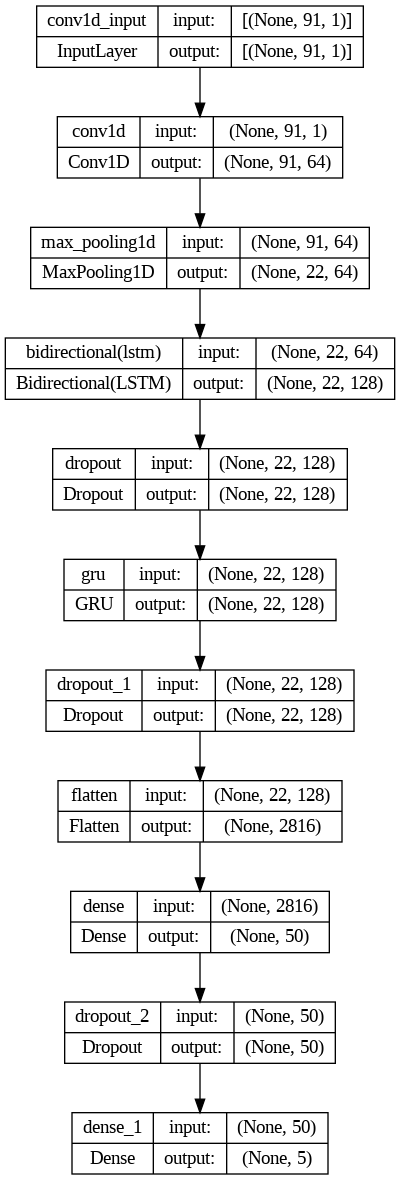

In [69]:
plot_model(model, to_file='model_summary.png', show_shapes=True, show_layer_names=True)

##**PELATIHAN MODEL (TRAINING MODEL)**

###Inisiasi EarlyStopping

In [70]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

###Pelatihan Model

In [71]:
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1480/1480 [==============================] - 225s 146ms/step - loss: 0.1509 - accuracy: 0.9524 - val_loss: 0.0865 - val_accuracy: 0.9699
Epoch 2/100
1480/1480 [==============================] - 195s 132ms/step - loss: 0.0839 - accuracy: 0.9719 - val_loss: 0.0978 - val_accuracy: 0.9649
Epoch 3/100
1480/1480 [==============================] - 193s 130ms/step - loss: 0.0770 - accuracy: 0.9743 - val_loss: 0.0568 - val_accuracy: 0.9792
Epoch 4/100
1480/1480 [==============================] - 193s 131ms/step - loss: 0.0704 - accuracy: 0.9761 - val_loss: 0.0658 - val_accuracy: 0.9769
Epoch 5/100
1480/1480 [==============================] - 193s 131ms/step - loss: 0.0689 - accuracy: 0.9770 - val_loss: 0.0556 - val_accuracy: 0.9809
Epoch 6/100
1480/1480 [==============================] - 196s 132ms/step - loss: 0.0649 - accuracy: 0.9777 - val_loss: 0.0594 - val_accuracy: 0.9801
Epoch 7/100
1480/1480 [==============================] - 194s 131ms/step - loss: 0.0620 - accuracy: 0.9788

###Grafik Akurasi Pelatihan & Validasi

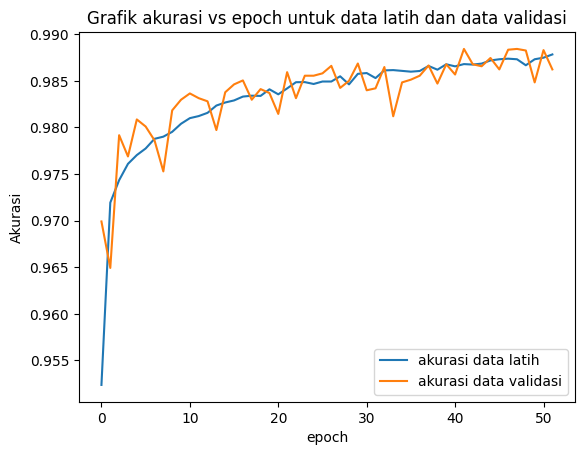

In [72]:
# Grafik akurasi vs epoch untuk data latih dan data validasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Grafik akurasi vs epoch untuk data latih dan data validasi")
plt.ylabel('Akurasi')
plt.xlabel('epoch')
plt.legend(['akurasi data latih', 'akurasi data validasi'], loc='lower right')
plt.show()

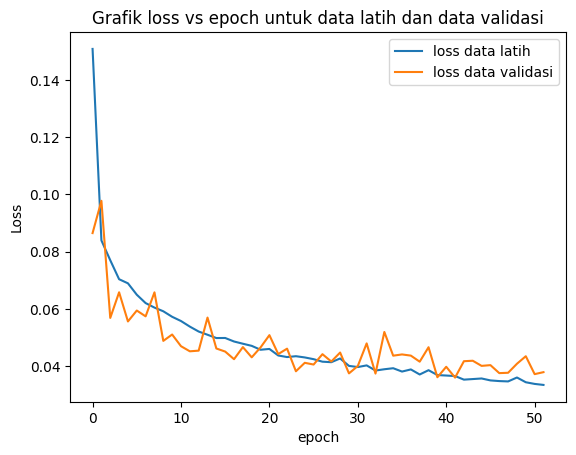

In [75]:
# Grafik loss vs epoch untuk data latih dan data validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Grafik loss vs epoch untuk data latih dan data validasi")
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss data latih', 'loss data validasi'], loc='upper right')
plt.show()

###Akurasi & Loss Data Latih dan Data Validasi

In [76]:
# Mendapatkan hasil akurasi dari data training dan validasi
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [80]:
# Mendapatkan hasil loss dari data training dan validasi
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [83]:
train_accuracy = pd.Series(train_accuracy)
val_accuracy = pd.Series(val_accuracy)
train_loss = pd.Series(train_loss)
val_loss = pd.Series(val_loss)

In [89]:
print(f'Train results - Loss: {train_loss.min()} - Accuracy: {train_accuracy.max()}')
print(f'validation results - Loss: {val_loss.min()} - Accuracy: {val_accuracy.max()}')

Train results - Loss: 0.03337562456727028 - Accuracy: 0.9878301024436951
validation results - Loss: 0.03594221547245979 - Accuracy: 0.9884217381477356


##**HASIL EVALUASI**

###Confusion Matrix

In [90]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

925/925 [==============================] - 20s 21ms/step


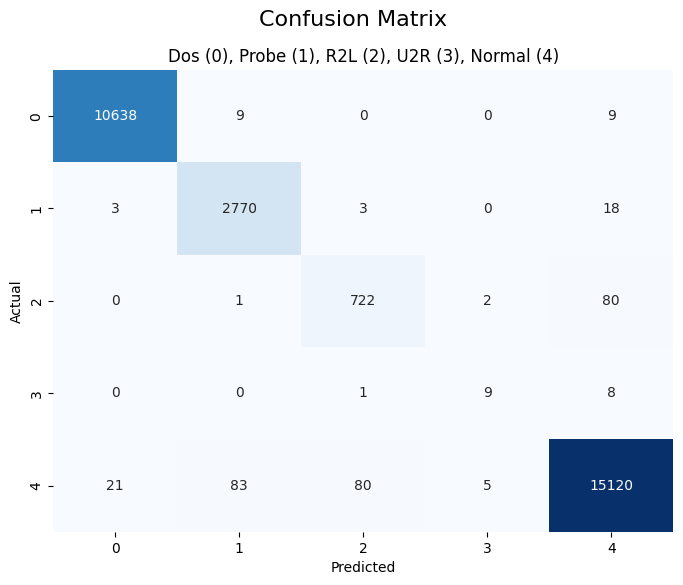

In [91]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Menampilkan confusion matrix dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.suptitle('Confusion Matrix', fontsize=16)
plt.title('Dos (0), Probe (1), R2L (2), U2R (3), Normal (4)')
plt.show()

###Akurasi

In [100]:
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

925/925 [==============================] - 20s 21ms/step - loss: 0.0341 - accuracy: 0.9891
Test results - Loss: 0.034132033586502075 - Accuracy: 98.90812039375305%


###True Positive

In [92]:
#mendapatkan true positive untuk masing-masing kelas

TP_class_0 = cm[0, 0]
# TP untuk kelas ke-1
TP_class_1 = cm[1, 1]
# TP untuk kelas ke-2
TP_class_2 = cm[2, 2]
# TP untuk kelas ke-3
TP_class_3 = cm[3, 3]
# TP untuk kelas ke-4
TP_class_4 = cm[4, 4]

print(f"True Positive (TP) untuk kelas Dos    : {TP_class_0}")
print(f"True Positive (TP) untuk kelas Probe  : {TP_class_1}")
print(f"True Positive (TP) untuk kelas R2L    : {TP_class_2}")
print(f"True Positive (TP) untuk kelas U2R    : {TP_class_3}")
print(f"True Positive (TP) untuk kelas Normal : {TP_class_4}")

True Positive (TP) untuk kelas Dos    : 10638
True Positive (TP) untuk kelas Probe  : 2770
True Positive (TP) untuk kelas R2L    : 722
True Positive (TP) untuk kelas U2R    : 9
True Positive (TP) untuk kelas Normal : 15120


###False Negative

In [93]:
# Mendapatkan nilai False Negative (FN) untuk masing-masing kelas
# FN untuk kelas ke-0
FN_class_0 = sum(cm[0, :]) - cm[0, 0]
# FN untuk kelas ke-1
FN_class_1 = sum(cm[1, :]) - cm[1, 1]
# FN untuk kelas ke-2
FN_class_2 = sum(cm[2, :]) - cm[2, 2]
# FN untuk kelas ke-3
FN_class_3 = sum(cm[3, :]) - cm[3, 3]
# FN untuk kelas ke-4
FN_class_4 = sum(cm[4, :]) - cm[4, 4]

print(f"False Negative (FN) untuk Dos   : {FN_class_0}")
print(f"False Negative (FN) untuk Probe : {FN_class_1}")
print(f"False Negative (FN) untuk R2L   : {FN_class_2}")
print(f"False Negative (FN) untuk U2R   : {FN_class_3}")
print(f"False Negative (FN) untuk Normal: {FN_class_4}")

False Negative (FN) untuk Dos   : 18
False Negative (FN) untuk Probe : 24
False Negative (FN) untuk R2L   : 83
False Negative (FN) untuk U2R   : 9
False Negative (FN) untuk Normal: 189


###True Negative

In [94]:
TN_class_0 = sum(sum(cm)) - sum(cm[0, :]) - sum(cm[:, 0]) + cm[0, 0]
# TN untuk kelas ke-1
TN_class_1 = sum(sum(cm)) - sum(cm[1, :]) - sum(cm[:, 1]) + cm[1, 1]
# TN untuk kelas ke-2
TN_class_2 = sum(sum(cm)) - sum(cm[2, :]) - sum(cm[:, 2]) + cm[2, 2]
# TN untuk kelas ke-3
TN_class_3 = sum(sum(cm)) - sum(cm[3, :]) - sum(cm[:, 3]) + cm[3, 3]
# TN untuk kelas ke-4
TN_class_4 = sum(sum(cm)) - sum(cm[4, :]) - sum(cm[:, 4]) + cm[4, 4]

print(f"True Negative (TN) untuk Dos    : {TN_class_0}")
print(f"True Negative (TN) untuk Probe  : {TN_class_1}")
print(f"True Negative (TN) untuk R2L    : {TN_class_2}")
print(f"True Negative (TN) untuk U2R    : {TN_class_3}")
print(f"True Negative (TN) untuk Normal : {TN_class_4}")

True Negative (TN) untuk Dos    : 18902
True Negative (TN) untuk Probe  : 26695
True Negative (TN) untuk R2L    : 28693
True Negative (TN) untuk U2R    : 29557
True Negative (TN) untuk Normal : 14158


###False Positive

In [95]:
# Mendapatkan nilai False Positive (FP) untuk masing-masing kelas
# FP untuk kelas ke-0
FP_class_0 = sum(cm[:, 0]) - cm[0, 0]
# FP untuk kelas ke-1
FP_class_1 = sum(cm[:, 1]) - cm[1, 1]
# FP untuk kelas ke-2
FP_class_2 = sum(cm[:, 2]) - cm[2, 2]
# FP untuk kelas ke-3
FP_class_3 = sum(cm[:, 3]) - cm[3, 3]
# FP untuk kelas ke-4
FP_class_4 = sum(cm[:, 4]) - cm[4, 4]

print(f"False Positive (FP) untuk Dos   : {FP_class_0}")
print(f"False Positive (FP) untuk Probe : {FP_class_1}")
print(f"False Positive (FP) untuk R2L   : {FP_class_2}")
print(f"False Positive (FP) untuk U2R   : {FP_class_3}")
print(f"False Positive (FP) untuk Normal: {FP_class_4}")

False Positive (FP) untuk Dos   : 24
False Positive (FP) untuk Probe : 93
False Positive (FP) untuk R2L   : 84
False Positive (FP) untuk U2R   : 7
False Positive (FP) untuk Normal: 115


###Akurasi

In [191]:
Accuracy_Dos = (TP_class_0 + TN_class_0)/(TP_class_0 + TN_class_0 + FP_class_0 + FN_class_0)
Accuracy_Probe = (TP_class_1 + TN_class_1)/(TP_class_1 + TN_class_1 + FP_class_1 + FN_class_1)
Accuracy_R2L = (TP_class_2 + TN_class_2)/(TP_class_2 + TN_class_2 + FP_class_2 + FN_class_2)
Accuracy_U2R = (TP_class_3 + TN_class_3)/(TP_class_3 + TN_class_3 + FP_class_3 + FN_class_3)
Accuracy_Normal = (TP_class_4 + TN_class_4)/(TP_class_4 + TN_class_4 + FP_class_4 + FN_class_4)

print(f'Akurasi DoS: ({TP_class_0} + {TN_class_0})/({TP_class_0} + {TN_class_0} + {FP_class_0} + {FN_class_0}) = {Accuracy_Dos*100:.2f}')
print(f'Akurasi Probe: ({TP_class_1} + {TN_class_1})/({TP_class_1} + {TN_class_1} + {FP_class_1} + {FN_class_1}) = {Accuracy_Probe*100:.2f}')
print(f'Akurasi R2L: ({TP_class_2} + {TN_class_2})/({TP_class_2} + {TN_class_2} + {FP_class_2} + {FN_class_2}) = {Accuracy_R2L*100:.2f}')
print(f'Akurasi U2R: ({TP_class_3} + {TN_class_3})/({TP_class_3} + {TN_class_3} + {FP_class_3} + {FN_class_3}) = {Accuracy_U2R*100:.2f}')
print(f'Akurasi Normal: ({TP_class_4} + {TN_class_4})/({TP_class_4} + {TN_class_4} + {FP_class_4} + {FN_class_4}) = {Accuracy_Normal*100:.2f}')

Akurasi DoS: (10638 + 18902)/(10638 + 18902 + 24 + 18) = 99.86
Akurasi Probe: (2770 + 26695)/(2770 + 26695 + 93 + 24) = 99.60
Akurasi R2L: (722 + 28693)/(722 + 28693 + 84 + 83) = 99.44
Akurasi U2R: (9 + 29557)/(9 + 29557 + 7 + 9) = 99.95
Akurasi Normal: (15120 + 14158)/(15120 + 14158 + 115 + 189) = 98.97


In [192]:
Total_TP = (TP_class_0 + TP_class_1 + TP_class_2 + TP_class_3 + TP_class_4)
Total_TN = (TN_class_0 + TN_class_1 + TN_class_2 + TN_class_3 + TN_class_4)
Total_FP = (FP_class_0 + FP_class_1 + FP_class_2 + FP_class_3 + FP_class_4)
Total_FN = (FN_class_0 + FN_class_1 + FN_class_2 + FN_class_3 + FN_class_4)

Total_Accuracy = (Total_TP + Total_TN)/(Total_TP + Total_TN + Total_FP + Total_FN)
print(f'Total Akurasi: ({Total_TP} + {Total_TN})/({Total_TP} + {Total_TN} + {Total_FP} + {Total_FN}) = {Total_Accuracy*100:.2f}')

Total Akurasi: (29259 + 118005)/(29259 + 118005 + 323 + 323) = 99.56


###False Negative Rate & True Positive Rate

In [193]:
FNR_0 = FN_class_0 / (FN_class_0 + TP_class_0)
TPR_0 = TP_class_0 / (TP_class_0 + FN_class_0)

FNR_1 = FN_class_1 / (FN_class_1 + TP_class_1)
TPR_1 = TP_class_1 / (TP_class_1 + FN_class_1)

FNR_2 = FN_class_2 / (FN_class_2 + TP_class_2)
TPR_2 = TP_class_2 / (TP_class_2 + FN_class_2)

FNR_3 = FN_class_3 / (FN_class_3 + TP_class_3)
TPR_3 = TP_class_3 / (TP_class_3 + FN_class_3)

FNR_4 = FN_class_4 / (FN_class_4 + TP_class_4)
TPR_4 = TP_class_4 / (TP_class_4 + FN_class_4)

Total_FNR =  Total_FN / (Total_FN + Total_FP)
Total_TPR =  Total_TP / (Total_TP + Total_FN)

print(f"  False Negative Rate (FNR) Dos     : ({FN_class_0}) / ({FN_class_0} + {TP_class_0}) = {FNR_0*100:.2f}%,  True Positive Rate (TPR) Dos    : ({TP_class_0}) / ({TP_class_0} + {FN_class_0}) = {TPR_0*100:.2f}%")
print(f"  False Negative Rate (FNR) Probe   : ({FN_class_1}) / ({FN_class_1} + {TP_class_1}) = {FNR_1*100:.2f}%,  True Positive Rate (TPR) Probe  : ({TP_class_1}) / ({TP_class_1} + {FN_class_1}) = {TPR_1*100:.2f}%")
print(f"  False Negative Rate (FNR) R2L     : ({FN_class_2}) / ({FN_class_2} + {TP_class_2}) = {FNR_2*100:.2f}%,  True Positive Rate (TPR) R2L    : ({TP_class_2}) / ({TP_class_2} + {FN_class_2}) = {TPR_2*100:.2f}%")
print(f"  False Negative Rate (FNR) U2R     : ({FN_class_3}) / ({FN_class_3} + {TP_class_3}) = {FNR_3*100:.2f}%,  True Positive Rate (TPR) U2R    : ({TP_class_3}) / ({TP_class_3} + {FN_class_3}) = {TPR_3*100:.2f}%")
print(f"  False Negative Rate (FNR) Normal  : ({FN_class_4}) / ({FN_class_4} + {TP_class_4}) = {FNR_4*100:.2f}%,  True Positive Rate (TPR) Normal : ({TP_class_4}) / ({TP_class_4} + {FN_class_4}) = {TPR_4*100:.2f}%")
print('\n')
print(f"  Total False Negative Rate (FNR)   : ({Total_FN}) / ({Total_FN} + {Total_TP}) = {Total_FNR*100:.2f}%,  True Positive Rate (TPR) Normal : ({Total_TP}) / ({Total_TP} + {Total_FN}) = {Total_TPR*100:.2f}%")

  False Negative Rate (FNR) Dos     : (18) / (18 + 10638) = 0.17%,  True Positive Rate (TPR) Dos    : (10638) / (10638 + 18) = 99.83%
  False Negative Rate (FNR) Probe   : (24) / (24 + 2770) = 0.86%,  True Positive Rate (TPR) Probe  : (2770) / (2770 + 24) = 99.14%
  False Negative Rate (FNR) R2L     : (83) / (83 + 722) = 10.31%,  True Positive Rate (TPR) R2L    : (722) / (722 + 83) = 89.69%
  False Negative Rate (FNR) U2R     : (9) / (9 + 9) = 50.00%,  True Positive Rate (TPR) U2R    : (9) / (9 + 9) = 50.00%
  False Negative Rate (FNR) Normal  : (189) / (189 + 15120) = 1.23%,  True Positive Rate (TPR) Normal : (15120) / (15120 + 189) = 98.77%


  Total False Negative Rate (FNR)   : (323) / (323 + 29259) = 50.00%,  True Positive Rate (TPR) Normal : (29259) / (29259 + 323) = 98.91%


###False Alarm Rate

In [188]:
FAR_class_0 = FP_class_0 / (TN_class_0 + FP_class_0)
FAR_class_1 = FP_class_1 / (TN_class_1 + FP_class_1)
FAR_class_2 = FP_class_2 / (TN_class_2 + FP_class_2)
FAR_class_3 = FP_class_3 / (TN_class_3 + FP_class_3)
FAR_class_4 = FP_class_4 / (TN_class_4 + FP_class_4)

Total_FAR = Total_FP / (Total_TN + Total_FP)

print(f"False Alarm Rate (FAR) untuk Dos    : ({FP_class_0}) / ({TN_class_0} + {FP_class_0}) = {round(FAR_class_0*100, 2):.2f}%")
print(f"False Alarm Rate (FAR) untuk Probe  : ({FP_class_1}) / ({TN_class_1} + {FP_class_1}) = {round(FAR_class_1*100, 2):.2f}%")
print(f"False Alarm Rate (FAR) untuk R2L    : ({FP_class_2}) / ({TN_class_2} + {FP_class_2}) = {round(FAR_class_2*100, 2):.2f}%")
print(f"False Alarm Rate (FAR) untuk U2R    : ({FP_class_3}) / ({TN_class_3} + {FP_class_3}) = {round(FAR_class_3*100, 2):.2f}%")
print(f"False Alarm Rate (FAR) untuk Normal : ({FP_class_4}) / ({TN_class_4} + {FP_class_4}) = {round(FAR_class_4*100, 2):.2f}%")
print('\n')
print(f"Total False Alarm Rate (FAR)        : ({Total_FP}) / ({Total_TN} + {Total_FP}) = {round(Total_FAR*100, 2):.2f}%")

False Alarm Rate (FAR) untuk Dos    : (24) / (18902 + 24) = 0.13%
False Alarm Rate (FAR) untuk Probe  : (93) / (26695 + 93) = 0.35%
False Alarm Rate (FAR) untuk R2L    : (84) / (28693 + 84) = 0.29%
False Alarm Rate (FAR) untuk U2R    : (7) / (29557 + 7) = 0.02%
False Alarm Rate (FAR) untuk Normal : (115) / (14158 + 115) = 0.81%


Total False Alarm Rate (FAR)        : (323) / (118005 + 323) = 0.27%


###Precision

In [187]:
Precision_class_0 = TP_class_0 / (TP_class_0 + FP_class_0)
Precision_class_1 = TP_class_1 / (TP_class_1 + FP_class_1)
Precision_class_2 = TP_class_2 / (TP_class_2 + FP_class_2)
Precision_class_3 = TP_class_3 / (TP_class_3 + FP_class_3)
Precision_class_4 = TP_class_4 / (TP_class_4 + FP_class_4)

Total_Precision = Total_TP / (Total_TP + Total_FP)

print(f"Precision untuk Dos    : ({TP_class_0}) / ({TP_class_0} + {FP_class_0}) = {round(Precision_class_0*100, 2):.2f}%")
print(f"Precision untuk Probe  : ({TP_class_1}) / ({TP_class_1} + {FP_class_1}) = {round(Precision_class_1*100, 2):.2f}%")
print(f"Precision untuk R2L    : ({TP_class_2}) / ({TP_class_2} + {FP_class_2}) = {round(Precision_class_2*100, 2):.2f}%")
print(f"Precision untuk U2R    : ({TP_class_3}) / ({TP_class_3} + {FP_class_3}) = {round(Precision_class_3*100, 2):.2f}%")
print(f"Precision untuk Normal : ({TP_class_4}) / ({TP_class_4} + {FP_class_4}) = {round(Precision_class_4*100, 2):.2f}%")
print('\n')
print(f"Total Precision        : ({Total_TP}) / ({Total_TP} + {Total_FP}) = {round(Total_Precision*100, 2):.2f}%")

Precision untuk Dos    : (10638) / (10638 + 24) = 99.77%
Precision untuk Probe  : (2770) / (2770 + 93) = 96.75%
Precision untuk R2L    : (722) / (722 + 84) = 89.58%
Precision untuk U2R    : (9) / (9 + 7) = 56.25%
Precision untuk Normal : (15120) / (15120 + 115) = 99.25%


Total Precision        : (29259) / (29259 + 323) = 98.91%


###F1-Score

In [195]:
F1_Score_class_0 = 2 * (Precision_class_0 * TPR_0) / (Precision_class_0 + TPR_0)
F1_Score_class_1 = 2 * (Precision_class_1 * TPR_1) / (Precision_class_1 + TPR_1)
F1_Score_class_2 = 2 * (Precision_class_2 * TPR_2) / (Precision_class_2 + TPR_2)
F1_Score_class_3 = 2 * (Precision_class_3 * TPR_3) / (Precision_class_3 + TPR_3)
F1_Score_class_4 = 2 * (Precision_class_4 * TPR_4) / (Precision_class_4 + TPR_4)

Total_F1_Score = 2 * (Total_Precision * Total_TPR) / (Total_Precision + Total_TPR)

print(f"Precision untuk Dos    : 2 * ({Precision_class_0*100:.2f}% * {TPR_0*100:.2f}%) / ({Precision_class_0*100:.2f}% + {TPR_0*100:.2f}%) = {round(F1_Score_class_0*100, 2):.2f}%")
print(f"Precision untuk Probe  : 2 * ({Precision_class_1*100:.2f}% * {TPR_1*100:.2f}%) / ({Precision_class_1*100:.2f}% + {TPR_1*100:.2f}%) = {round(F1_Score_class_1*100, 2):.2f}%")
print(f"Precision untuk R2L    : 2 * ({Precision_class_2*100:.2f}% * {TPR_2*100:.2f}%) / ({Precision_class_2*100:.2f}% + {TPR_2*100:.2f}%) = {round(F1_Score_class_2*100, 2):.2f}%")
print(f"Precision untuk U2R    : 2 * ({Precision_class_3*100:.2f}% * {TPR_3*100:.2f}%) / ({Precision_class_3*100:.2f}% + {TPR_3*100:.2f}%) = {round(F1_Score_class_3*100, 2):.2f}%")
print(f"Precision untuk Normal : 2 * ({Precision_class_4*100:.2f}% * {TPR_4*100:.2f}%) / ({Precision_class_4*100:.2f}% + {TPR_4*100:.2f}%) = {round(F1_Score_class_4*100, 2):.2f}%")
print('\n')
print(f"Total F1-Score         : 2 * ({Total_Precision*100:.2f}% * {Total_TPR*100:.2f}%) / ({Total_Precision*100:.2f}% + {Total_TPR*100:.2f}%) = {round(Total_F1_Score*100, 2):.2f}%")

Precision untuk Dos    : 2 * (99.77% * 99.83%) / (99.77% + 99.83%) = 99.80%
Precision untuk Probe  : 2 * (96.75% * 99.14%) / (96.75% + 99.14%) = 97.93%
Precision untuk R2L    : 2 * (89.58% * 89.69%) / (89.58% + 89.69%) = 89.63%
Precision untuk U2R    : 2 * (56.25% * 50.00%) / (56.25% + 50.00%) = 52.94%
Precision untuk Normal : 2 * (99.25% * 98.77%) / (99.25% + 98.77%) = 99.00%


Total F1-Score         : 2 * (98.91% * 98.91%) / (98.91% + 98.91%) = 98.91%


###Precision, Recall, F1-Score

In [172]:
#micro f1
print('Micro Precision: {:.4f}'.format(precision_score(y_true_classes, y_pred_classes, average='micro')))
print('Micro Recall   : {:.4f}'.format(recall_score(y_true_classes, y_pred_classes, average='micro')))
print('Micro F1-score : {:.4f}\n'.format(f1_score(y_true_classes, y_pred_classes, average='micro')))

Micro Precision: 0.9891
Micro Recall   : 0.9891
Micro F1-score : 0.9891



In [174]:
#macro f1
print('\nClassification Report\n')
print(classification_report(y_true_classes, y_pred_classes))


Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10656
           1       0.97      0.99      0.98      2794
           2       0.90      0.90      0.90       805
           3       0.56      0.50      0.53        18
           4       0.99      0.99      0.99     15309

    accuracy                           0.99     29582
   macro avg       0.88      0.87      0.88     29582
weighted avg       0.99      0.99      0.99     29582

